Task3 Iris Flower Classification

Aim: to develop a model that can classify iris flowers into different species based on thier sepal & petal measurements.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Importing the dataset

In [2]:
iris_data=pd.read_csv(r"D:\Sanju\downloads(old laptop)\archive (3)\IRIS.csv")

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# factorize the species column
iris_data['species'],_ = pd.factorize(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Descriptive Statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# checking the null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data Visualization

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

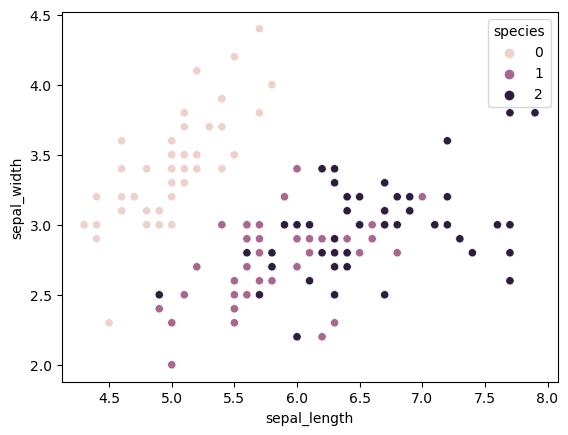

In [7]:
# Scatter plots
sns.scatterplot(data=iris_data,x='sepal_length',y='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

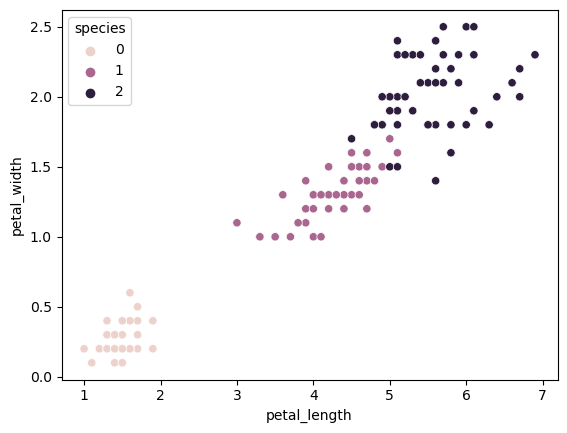

In [8]:
sns.scatterplot(data=iris_data,x='petal_length',y='petal_width',hue='species')

K-Mean Clustering

In [9]:
k_range=range(1,10)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(iris_data[['petal_length','petal_width']])
  sse.append(km.inertia_)

C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [10]:
sse

[550.6434666666668,
 86.40394533571005,
 31.387758974358974,
 19.48238901098901,
 13.933308757908756,
 11.056639971910451,
 9.213817958598737,
 7.686066305916307,
 6.601807522429261]

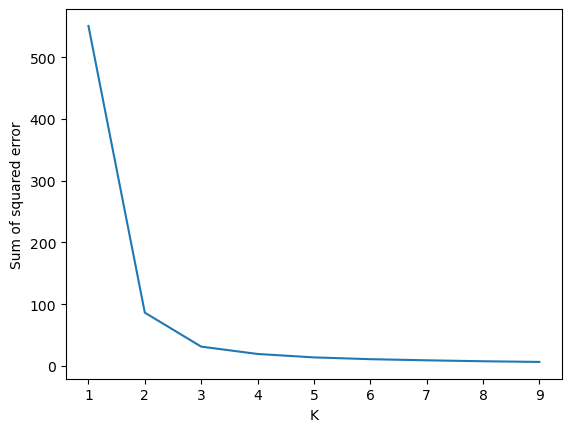

In [11]:
# using elbow method to find the optimize number of clusters
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [12]:
# KMean Algorithm
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(iris_data[['petal_length','petal_width']])
y_predicted

C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris_data['cluster']=y_predicted

In [14]:
iris_data.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [15]:
# accuracy measure
accuracy_score(iris_data['species'],iris_data['cluster'])

0.96

In [16]:
# confusion matrix
confusion_matrix(iris_data['species'],iris_data['cluster'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

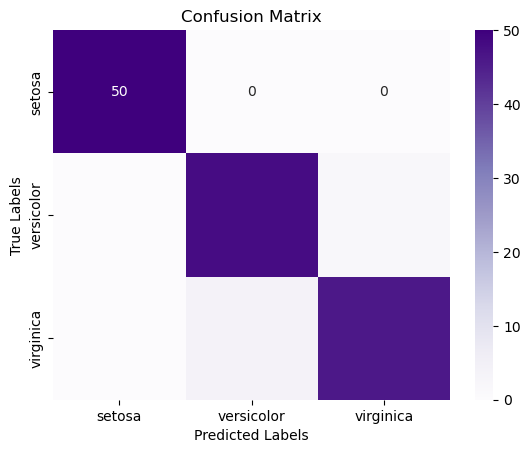

In [18]:
# plot confusion matrix
true_labels=iris_data['species']
predicted_labels=iris_data['cluster']
cm=confusion_matrix(true_labels,predicted_labels)
class_labels=['setosa','versicolor','virginica']

sns.heatmap(cm,annot=True,cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(3)+0.5,class_labels)
plt.yticks(np.arange(3)+0.5,class_labels)
plt.show()

In [ ]:
print(classification_report(iris_data['species'],iris_data['cluster']))